# Medical Insurance Cost Forecast🏥

## Data Pre-processing 🫠

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.shape

(1338, 7)

In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.shape

(1338, 7)

## Data Visualization (EDA) 😍

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#### ⋙ Univariate Analysis

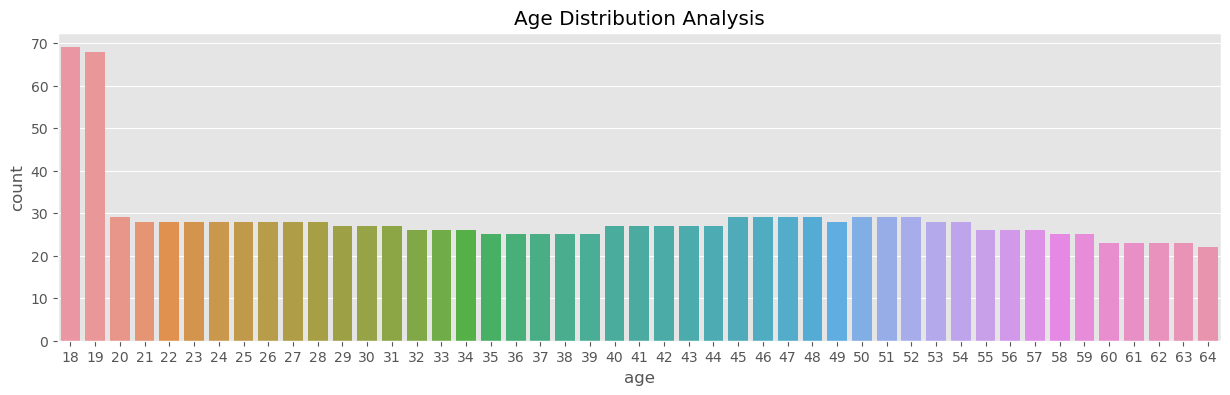

In [14]:
plt.figure(figsize=(15,4))
plt.style.use('ggplot')
sns.countplot(x='age', data=data)
plt.title('Age Distribution Analysis')
plt.show()

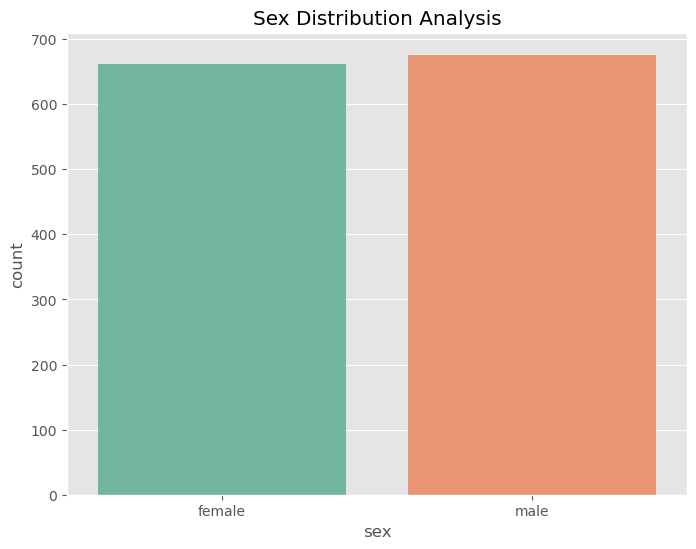

In [15]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(x='sex', data=data,  palette='Set2')
plt.title('Sex Distribution Analysis')
plt.show()

In [16]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

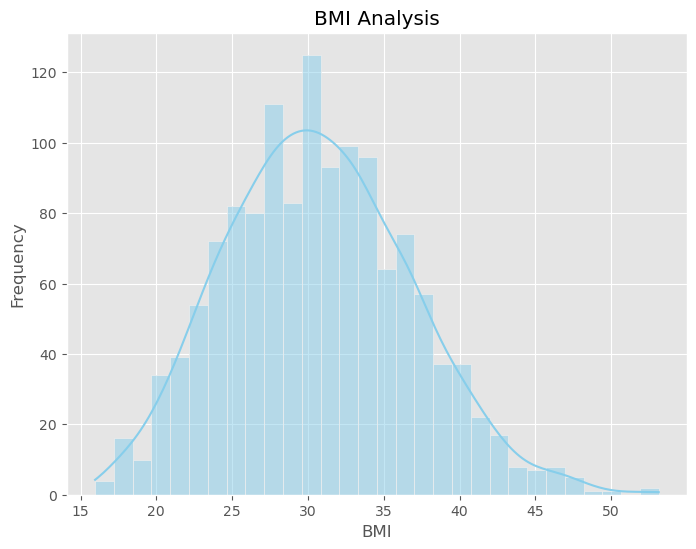

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=30, kde=True, color='skyblue')
plt.title('BMI Analysis')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

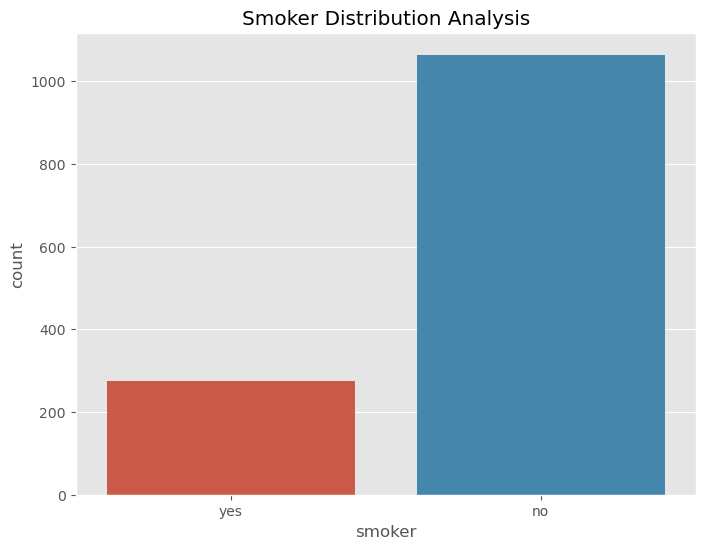

In [18]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution Analysis')
plt.show()

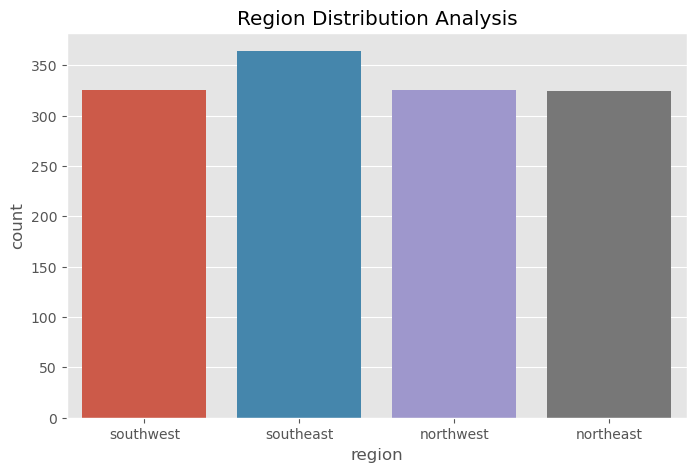

In [19]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.countplot(x='region', data=data)
plt.title('Region Distribution Analysis')
plt.show()

#### ⋙ Bivariate Analysis

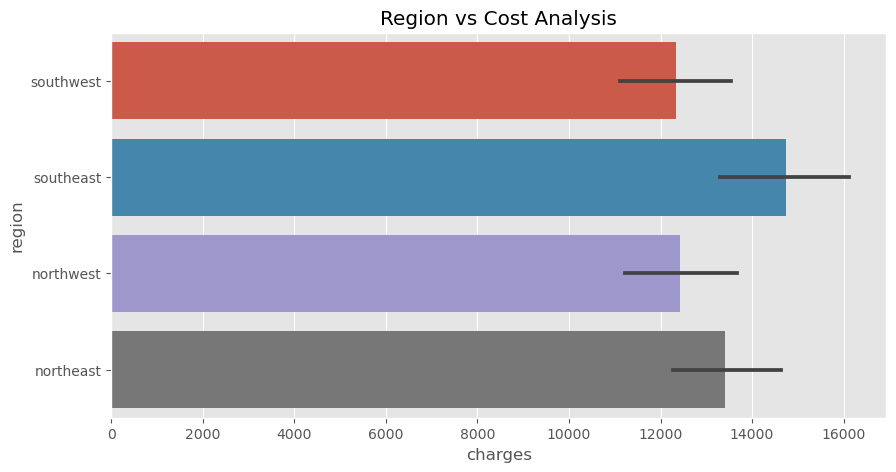

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='charges', y='region', data=data)
plt.title('Region vs Cost Analysis')
plt.show()

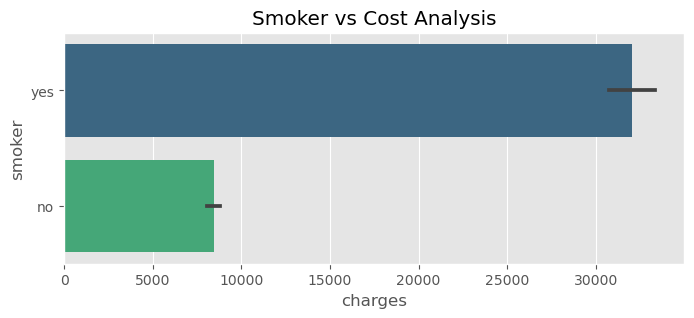

In [21]:
plt.figure(figsize=(8,3))
sns.barplot(x='charges', y='smoker', data=data, palette='viridis')
plt.title('Smoker vs Cost Analysis')
plt.show()

#### ⋙ Multivariate Analysis

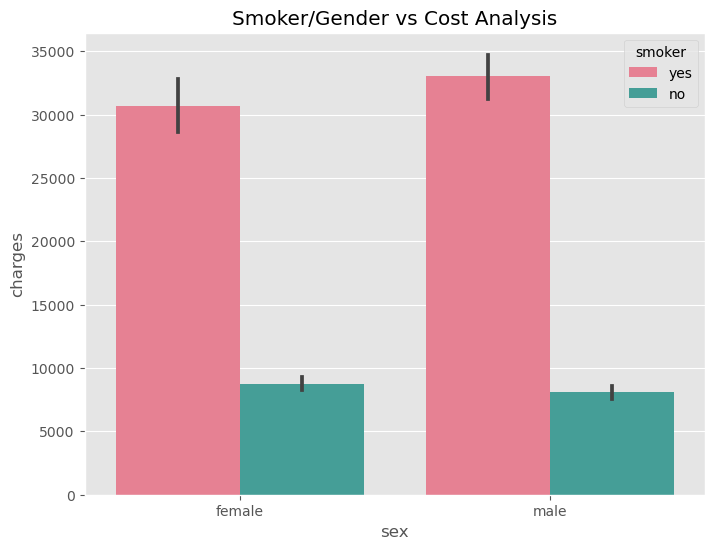

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='charges', hue='smoker', data=data, palette='husl')
plt.title('Smoker/Gender vs Cost Analysis')
plt.show()

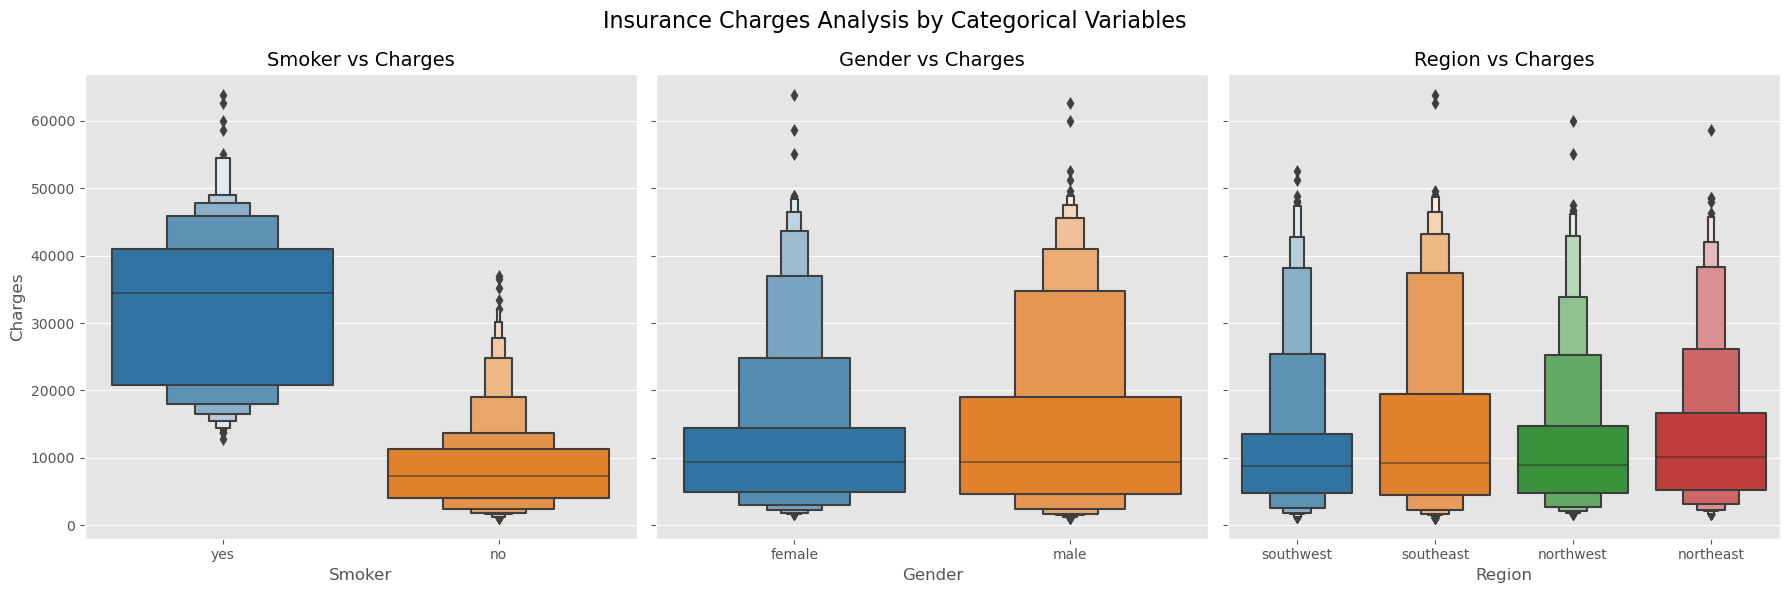

In [23]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Insurance Charges Analysis by Categorical Variables', fontsize=16)

sns.boxenplot(x='smoker', y='charges', data=data, ax=axes[0], palette=custom_palette)
sns.boxenplot(x='sex', y='charges', data=data, ax=axes[1], palette=custom_palette)
sns.boxenplot(x='region', y='charges', data=data, ax=axes[2], palette=custom_palette)

axes[0].set_title('Smoker vs Charges', fontsize=14)
axes[0].set_xlabel('Smoker', fontsize=12)
axes[0].set_ylabel('Charges', fontsize=12)

axes[1].set_title('Gender vs Charges', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('')

axes[2].set_title('Region vs Charges', fontsize=14)
axes[2].set_xlabel('Region', fontsize=12)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

C:\Users\drstr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


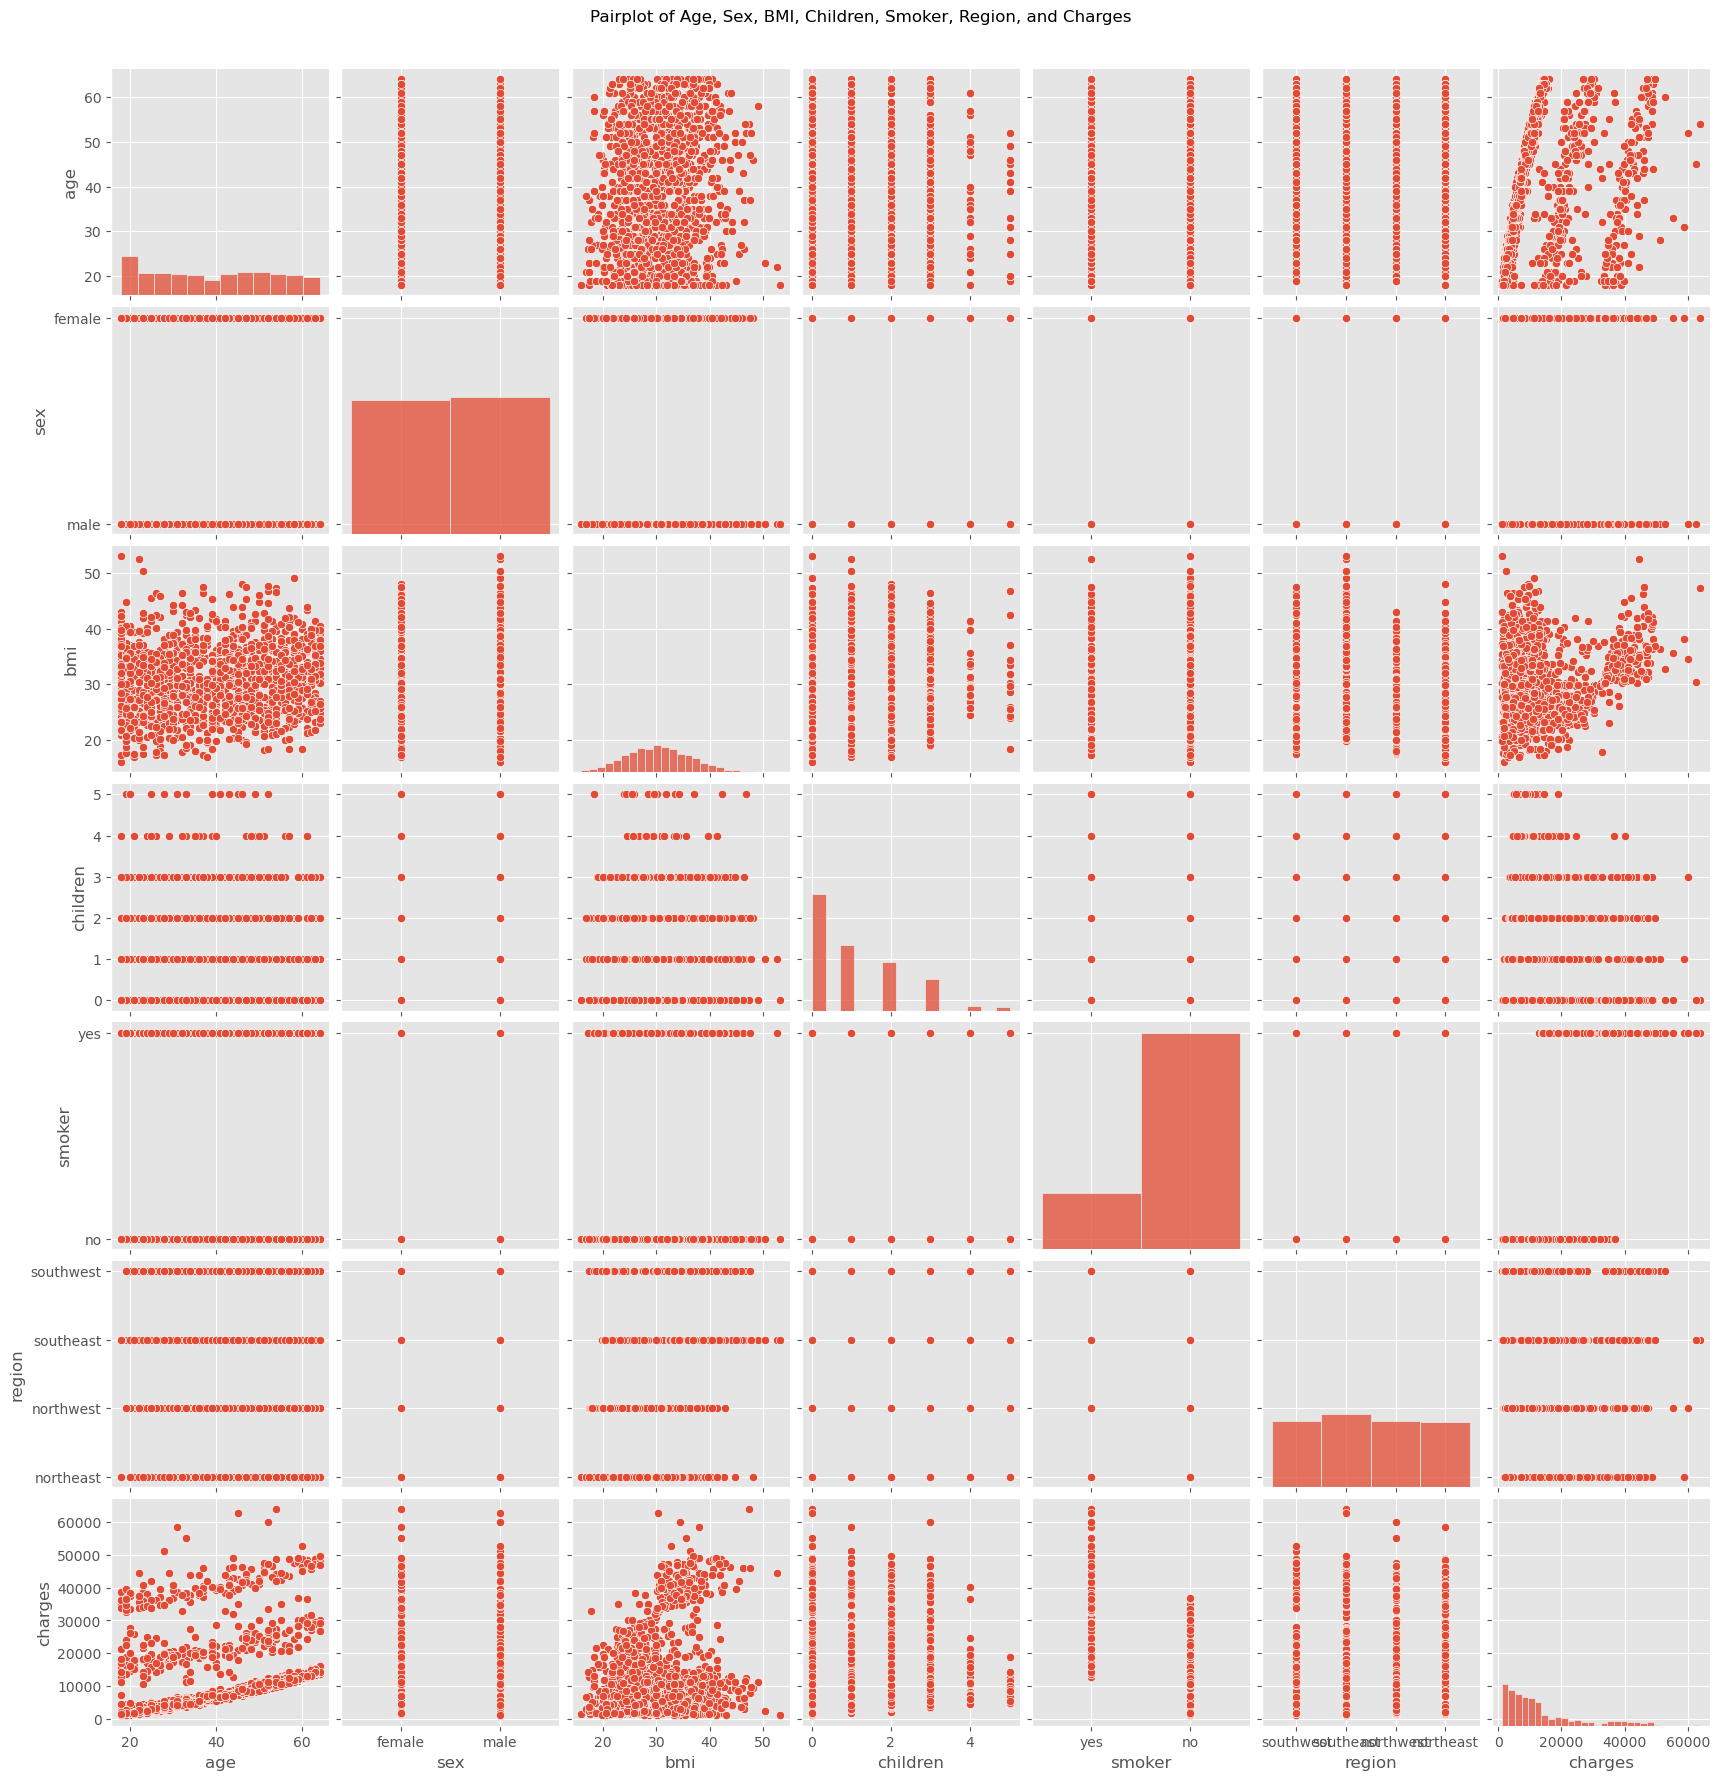

In [24]:
sns.pairplot(data=data, vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
plt.suptitle('Pairplot of Age, Sex, BMI, Children, Smoker, Region, and Charges', y=1.02)
plt.show()

## Feature Engineering ⛓ 

#### ⋙ Conversion of categorical columns

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


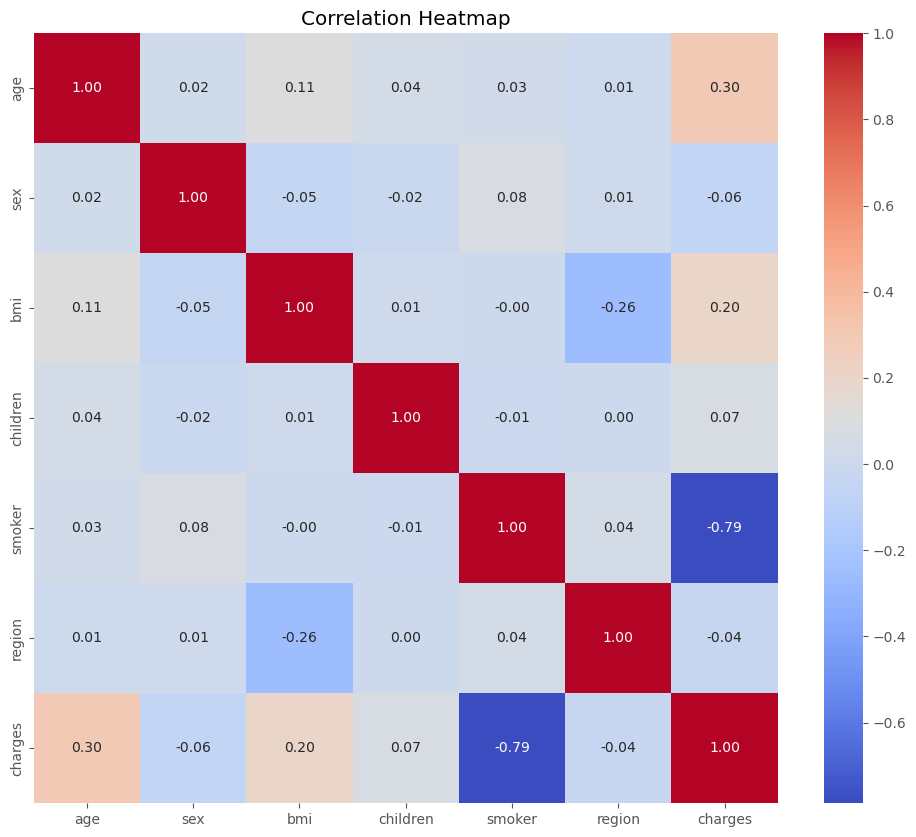

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### ⋙ Splitting into Train-Test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop('charges', axis=1)
Y = data['charges']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print("X shape: ", X.shape)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X shape:  (1338, 6)
X_train shape:  (1070, 6)
X_test shape:  (268, 6)


## Model Implementation/Evalution 🛠

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
LR = LinearRegression()

In [35]:
LR.fit(X_train,Y_train)
pred = LR.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
pred1 = LR.predict(X_train)

In [38]:
r1 = r2_score(Y_train, pred1)
print('R-squared value:', r1)

R-squared value: 0.7518195459072954


In [39]:
pred2 = LR.predict(X_test)

In [40]:
r2 = r2_score(Y_test, pred2)
print('R-squared value:', r2)

R-squared value: 0.7454471618659975


In [41]:
r2_score(Y_test,pred)

0.7454471618659975

In [42]:
dictionary = {'age':19, 'sex':1, 'bmi':27.900, 'children':0, 'smoker':0, 'region':1}
index = [0]
data0 = pd.DataFrame(dictionary, index)
data0

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,0,1


In [43]:
prediction = LR.predict(data0)
print("Medical Insurance Cost will be: ", prediction)

Medical Insurance Cost will be:  [25558.92638242]


In [51]:
LR

LinearRegression()

In [44]:
import pickle

In [45]:
filename = 'LR Model.pkl'


with open(filename, 'wb') as file:
    pickle.dump(LR, file)

print("Model saved successfully as:", filename)

Model saved successfully as: LR Model.pkl


In [46]:
with open(filename, 'rb') as file:
    p = pickle.load(file)

In [55]:
input_data = (50,0,20.72,3,1,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = p.predict(input_data_reshaped)
print(prediction)

[9015.14535963]


C:\Users\drstr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### NOW TO DEPLOYMENT PHASE 💐